# Datos de temperatura

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Información
# Temperatura
DataT = pd.read_csv("10375 CARRIZAL T2m ERA5-Land 1m (3.94,-68.14).csv", sep=";")

# Precipitación
DataP = pd.read_csv("10375 CARRIZAL Pptn ERA5-Land 1m (3.94,-68.14).csv", sep=";")

# Conversión de valores str a int
DataT = DataT.astype(float)

# Conversión de valores str a int
DataP = DataP.astype(float)

# Acumulado de precipitación por año

C:\Users\ROSA2\AppData\Local\Temp/ipykernel_8184/1868186838.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ob-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(Precs["Pm [mm]"], "ob-",color="k")


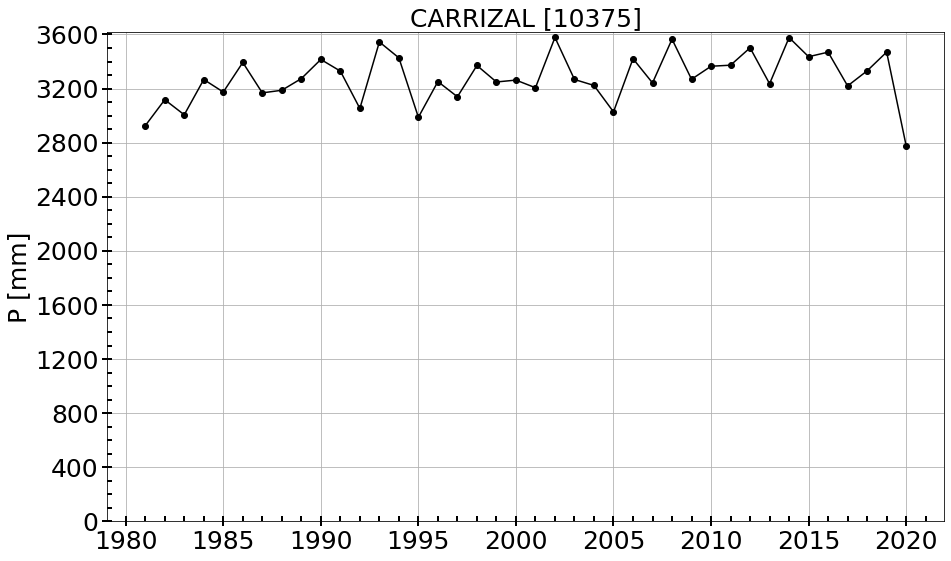

In [6]:
#Años=["1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996"]
# esto es lo mismo que Años
sizas = list(range(1981, 2021))

fig, ax = plt.subplots(figsize=[15,9])
lol=DataP.astype(float)
Precs=lol.groupby(by="Year").sum()
Precs = Precs.drop([2021.0],axis=0)
plt.plot(Precs["Pm [mm]"], "ob-",color="k")
#plt.xticks(range(1981, 2021,4),size=15)

#for index, value in enumerate(Precs["Pm [mm]"]): 
    #plt.text(index, value, int(value), size=15)

plt.ylabel("P [mm]", size=25)
plt.grid(axis='y')
plt.grid(axis='x')
plt.yticks(range(0,4000,400), size=25)
plt.xticks(size=25)
plt.title("CARRIZAL [10375]",size=25)
ax.minorticks_on()
ax.tick_params(which='major', length=10, width=2, direction='inout')
ax.tick_params(which='minor', length=5, width=2, direction='in')
plt.show()

In [2]:
DataT

,Year,Month,T2m1m []
0,1981.0,1.0,26.5
1,1981.0,2.0,25.5
2,1981.0,3.0,26.8
3,1981.0,4.0,25.4
4,1981.0,5.0,25.1
...,...,...,...
487,2021.0,8.0,NaN
488,2021.0,9.0,NaN
489,2021.0,10.0,NaN
490,2021.0,11.0,NaN


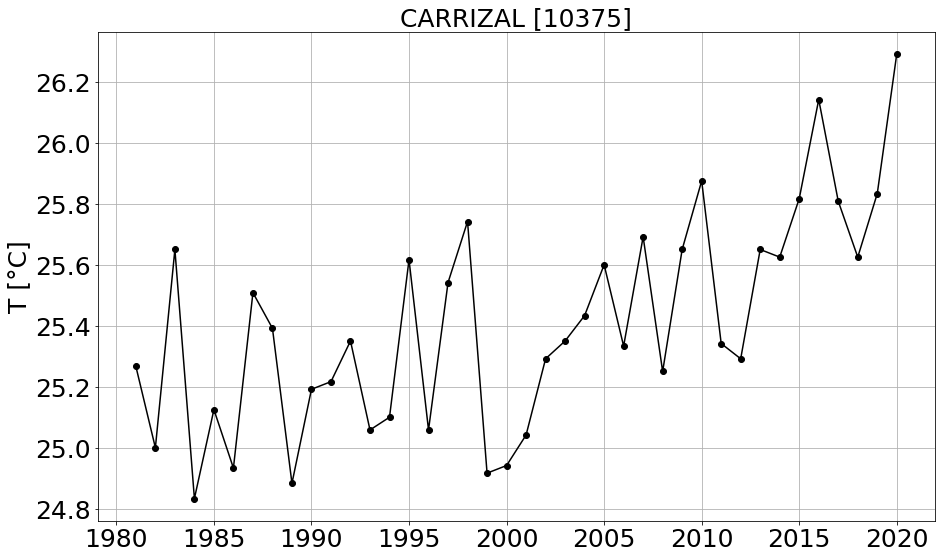

In [5]:
sizas = list(range(1981, 2021))

fig = plt.figure(figsize=[15,9])
lol=DataT.astype(float)
Precs=lol.groupby(by="Year").mean()
Precs = Precs.drop([2021.0],axis=0)
plt.plot(Precs["T2m1m []"], "ob-",color="k")
#plt.xticks(range(1981, 2021,4),size=15)

#for index, value in enumerate(Precs["Pm [mm]"]): 
    #plt.text(index, value, int(value), size=15)

plt.ylabel("T [°C]", size=25)
plt.grid(axis='y')
plt.grid(axis='x')
plt.xticks(size=25)
plt.yticks(size=25)
plt.title("CARRIZAL [10375]",size=25)
plt.show()

# RANGOS INTERCUANTILES (IQR)

Text(0.5, 1.0, 'IQR precipitación')

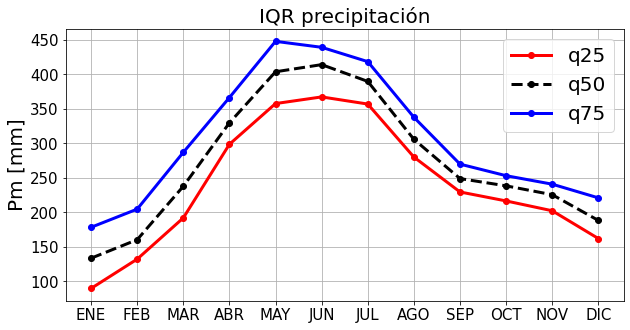

In [65]:
# IQR para precipitación
lol=DataP.astype(float)
Precm=lol.groupby(by="Month").mean()

qp25=DataP.groupby(by="Month").quantile(.25)
qp50=DataP.groupby(by="Month").quantile(.50)
qp75=DataP.groupby(by="Month").quantile(.75)

fig = plt.figure(figsize=[10,5])
Meses=["ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"]

plt.plot(Meses,qp25["Pm [mm]"], "ob-", color="red", label="q25", linewidth=3)
plt.plot(Meses,Precm["Pm [mm]"], "ob--", color="k", label="q50", linewidth=3)
#plt.plot(Meses,qp50["Pm [mm]"], "ob--", color="k", label="q50", linewidth=3)
plt.plot(Meses,qp75["Pm [mm]"], "ob-", color="blue", label="q75", linewidth=3)
plt.legend(loc="upper right", facecolor = "w", fontsize=20)
#plt.xlabel("Meses desde 1981 a 2022", size=20)
plt.ylabel("Pm [mm]", size=20)
plt.grid(axis='y')
plt.grid(axis='x')
plt.yticks(size=15)
plt.xticks(size=15)
plt.title("IQR precipitación", size=20)
#plt.plot(groupbyhrIDEAM["Valor"], "ob--", label = "IDEAM", color="mediumorchid")

Text(0.5, 1.0, 'IQR temperatura')

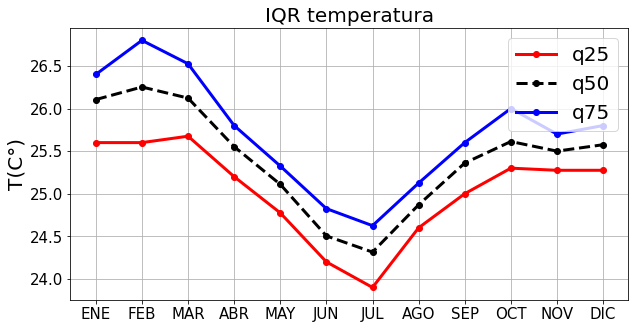

In [64]:
# IQR para temperatura

lol=DataT.astype(float)
Tempm=lol.groupby(by="Month").mean()

qt25=DataT.groupby(by="Month").quantile(.25)
qt50=DataT.groupby(by="Month").quantile(.50)
qt75=DataT.groupby(by="Month").quantile(.75)

fig = plt.figure(figsize=[10,5])
Meses=["ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"]

plt.plot(Meses,qt25["T2m1m []"], "ob-", color="red", label="q25", linewidth=3)
plt.plot(Meses,Tempm["T2m1m []"], "ob--", color="k", label="q50", linewidth=3)
#plt.plot(Meses,qt50["T2m1m []"], "ob--", color="k", label="q50", linewidth=3)
plt.plot(Meses,qt75["T2m1m []"], "ob-", color="blue", label="q75", linewidth=3)
plt.legend(loc="upper right", facecolor = "w", fontsize=20)
#plt.xlabel("Meses desde 1981 a 2022", size=20)
plt.ylabel("T(C°)", size=20)
plt.grid(axis='y')
plt.grid(axis='x')
plt.yticks(size=15)
plt.xticks(size=15)
plt.title("IQR temperatura", size=20)

# Ciclo Anual temperatura

Text(0.5, 1.0, 'CARRIZAL [10375]')

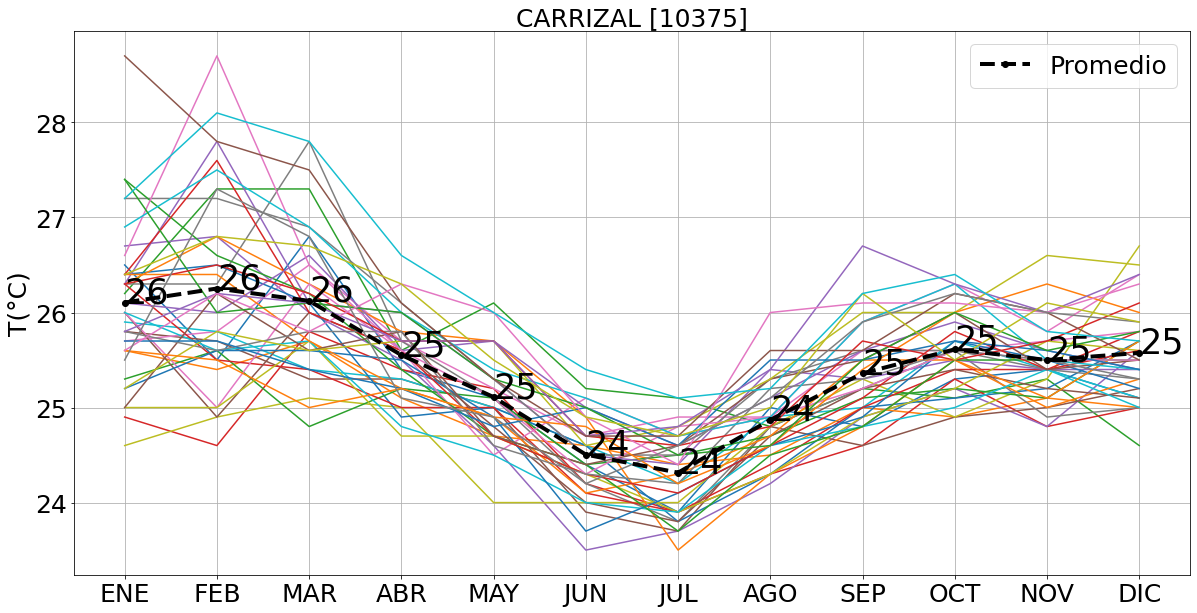

In [31]:
fig = plt.figure(figsize=[20,10])
lol=DataT.astype(float)
Tempm=lol.groupby(by="Month").mean()
Tempdsv=lol.groupby(by="Month").std()
#Meses=[1,2,3,4,5,6,7,8,9,10,11,12]
Meses=["ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"]

for i in range(0,491,12):
    dfx = DataT.iloc[i:i+12]
    p=dfx["T2m1m []"].astype(float)
    plt.plot(Meses,p)
    #plt.legend(loc="upper right", facecolor = "w", fontsize=10)
    #dfx["T2m1m []"].loc[i]
    
plt.plot(Meses,Tempm["T2m1m []"], "--ob", color="k", linewidth=4, label="Promedio")
#plt.fill_between(range(1,13), pito["Pm [mm]"] + pitos["Pm [mm]"], pito["Pm [mm]"] - pitos["Pm [mm]"], alpha=0.5, color = "y", label="Desviación estandar")
plt.legend(loc="upper right", facecolor = "w", fontsize=25)

for index, value in enumerate(Tempm["T2m1m []"]): 
    plt.text(index, value, int(value), color="k", size=35)

#plt.xlabel("Mes", size=20)
plt.ylabel("T(°C)", size=25)
plt.grid(axis='y')
plt.grid(axis='x')
plt.yticks(size=25)
plt.xticks(size=25)
plt.title("CARRIZAL [10375]",size=25)

# Promedio

Text(0.5, 1.0, 'CARRIZAL [10375]')

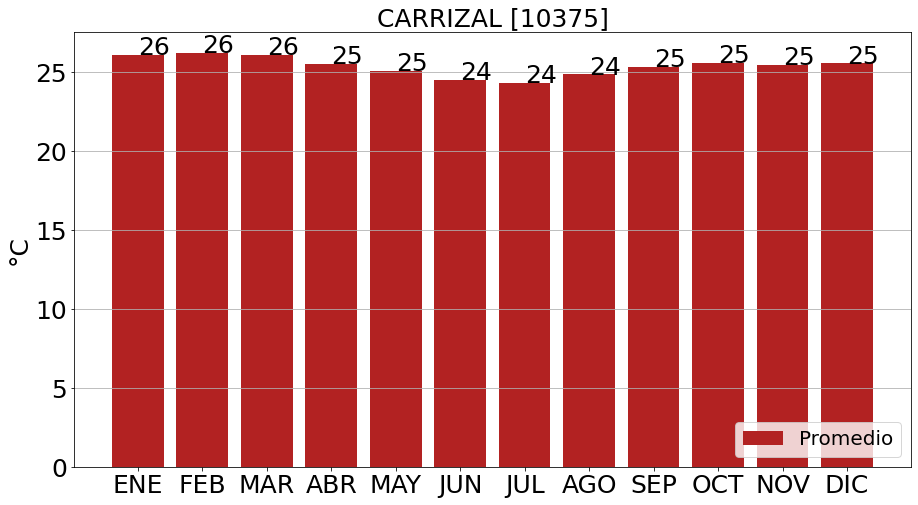

In [20]:
fig = plt.figure(figsize=[15,8])
Meses=["ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"]

plt.bar(Meses,Tempm["T2m1m []"], color="firebrick", label="Promedio")
plt.legend(loc="lower right", facecolor = "w", fontsize=20)
#plt.xlabel("Meses desde 1981 a 2022", size=20)
for index, value in enumerate(Tempm["T2m1m []"]): 
    plt.text(index, value, int(value), color="k", size=25)
plt.ylabel("°C", size=25)
plt.grid(axis='y')
#plt.grid(axis='x')
plt.yticks(size=25)
plt.xticks(size=25)
plt.title("CARRIZAL [10375]",size=25)
#plt.plot(groupbyhrIDEAM["Valor"], "ob--", label = "IDEAM", color="mediumorchid")

# Desviación Estandar

Text(0.5, 1.0, 'Desviación estandar Ciclo Anual Temperatura')

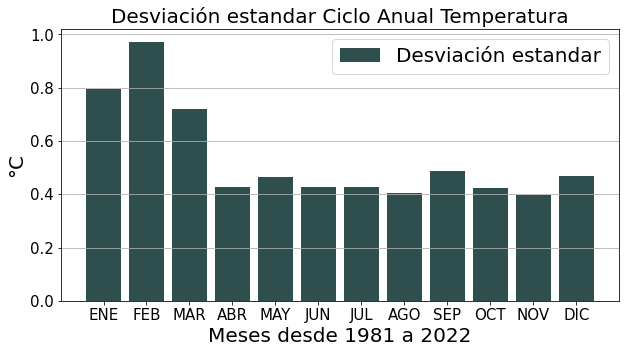

In [4]:
fig = plt.figure(figsize=[10,5])
Meses=["ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"]

plt.bar(Meses,Tempdsv["T2m1m []"], color="darkslategray", label="Desviación estandar")
plt.legend(loc="upper right", facecolor = "w", fontsize=20)
plt.xlabel("Meses desde 1981 a 2022", size=20)
plt.ylabel("°C", size=20)
plt.grid(axis='y')
#plt.grid(axis='x')
plt.yticks(size=15)
plt.xticks(size=15)
plt.title("Desviación estandar Ciclo Anual Temperatura", size=20)
#plt.plot(groupbyhrIDEAM["Valor"], "ob--", label = "IDEAM", color="mediumorchid")

# Promedio y Desviación estandar de ciclo anual de temperatura

Text(0.5, 1.0, 'Promedio y Desviación Estandar Precipitación Ciclo Anual')

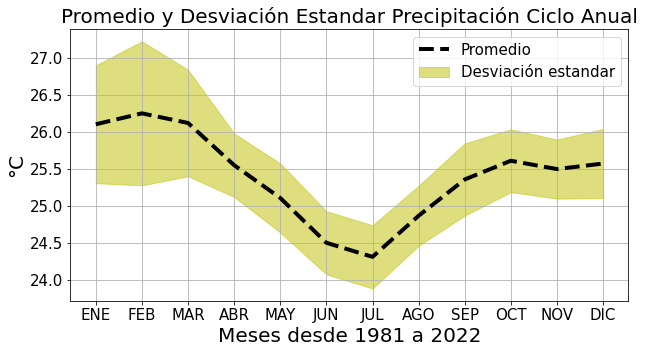

In [5]:
fig = plt.figure(figsize=[10,5])

plt.plot(Meses,Tempm["T2m1m []"], "--", color="k", linewidth=4, label="Promedio")
plt.fill_between(Meses, Tempm["T2m1m []"] + Tempdsv["T2m1m []"], Tempm["T2m1m []"] - Tempdsv["T2m1m []"], alpha=0.5, color = "y", label="Desviación estandar")
plt.legend(loc="upper right", facecolor = "w", fontsize=15)
plt.xlabel("Meses desde 1981 a 2022", size=20)
plt.ylabel("°C", size=20)
plt.grid(axis='y')
plt.grid(axis='x')
plt.yticks(size=15)
plt.xticks(size=15)
plt.title("Promedio y Desviación Estandar Precipitación Ciclo Anual", size=20)
#plt.plot(groupbyhrIDEAM["Valor"], "ob--", label = "IDEAM", color="mediumorchid")

# Ciclo Anual de Precipitación

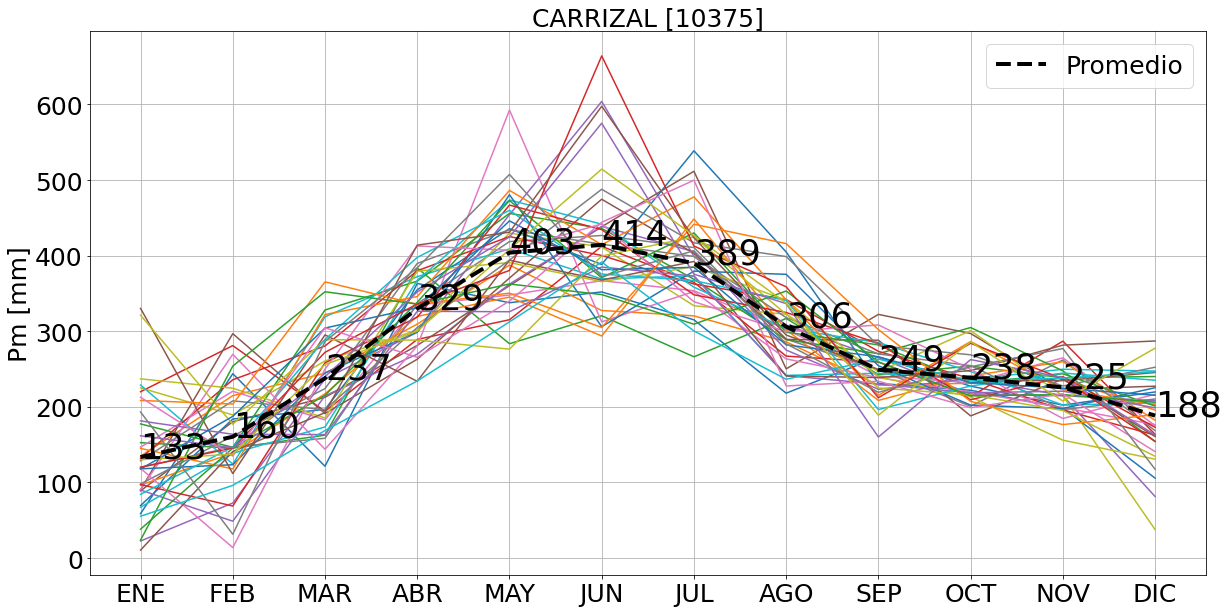

In [32]:
fig = plt.figure(figsize=[20,10])
lol=DataP.astype(float)
Precm=lol.groupby(by="Month").mean()
Precdsv=lol.groupby(by="Month").std()
Meses=["ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"]

for i in range(0,491,12):
    dfx = DataP.iloc[i:i+12]
    p=dfx["Pm [mm]"].astype(float)
    plt.plot(Meses,p)
    #plt.legend(loc="upper right", facecolor = "w", fontsize=10)
    
plt.plot(Meses,Precm["Pm [mm]"], "--", color="k", linewidth=4, label="Promedio")
#plt.fill_between(range(1,13), pito["Pm [mm]"] + pitos["Pm [mm]"], pito["Pm [mm]"] - pitos["Pm [mm]"], alpha=0.5, color = "y", label="Desviación estandar")
plt.legend(loc="upper right", facecolor = "w", fontsize=25)

#plt.xlabel("Mes", size=20)
plt.ylabel("Pm [mm]", size=25)
plt.grid(axis='y')
plt.grid(axis='x')
plt.yticks(size=25)
plt.xticks(size=25)

for index, value in enumerate(Precm["Pm [mm]"]): 
    plt.text(index, value, int(value), color="k", size=35)

plt.title("CARRIZAL [10375]",size=25)

# Promedio de Precipitación y Temperatura

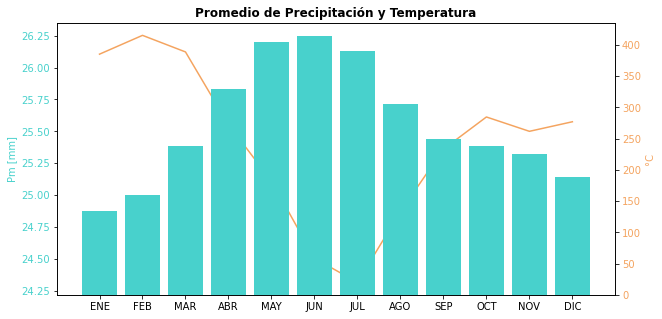

In [7]:
fig, ax1 = plt.subplots(figsize=[10,5])  

#color = 'tab:red'
#ax1.set_xlabel('Meses')  
ax1.set_ylabel('Pm [mm]', color = 'mediumturquoise')  
ax1.plot(Meses, Tempm["T2m1m []"], color = 'sandybrown')  
ax1.tick_params(axis ='y', labelcolor = 'mediumturquoise')  
  
ax2 = ax1.twinx()  
  
#color = 'tab:green'
ax2.set_ylabel('°C', color = 'sandybrown')  
ax2.bar(Meses, Precm["Pm [mm]"], color = 'mediumturquoise')  
ax2.tick_params(axis ='y', labelcolor = 'sandybrown')  
  
plt.title('Promedio de Precipitación y Temperatura', fontweight ="bold")  
  
plt.show()

# Promedio de Precipitación y Temperatura

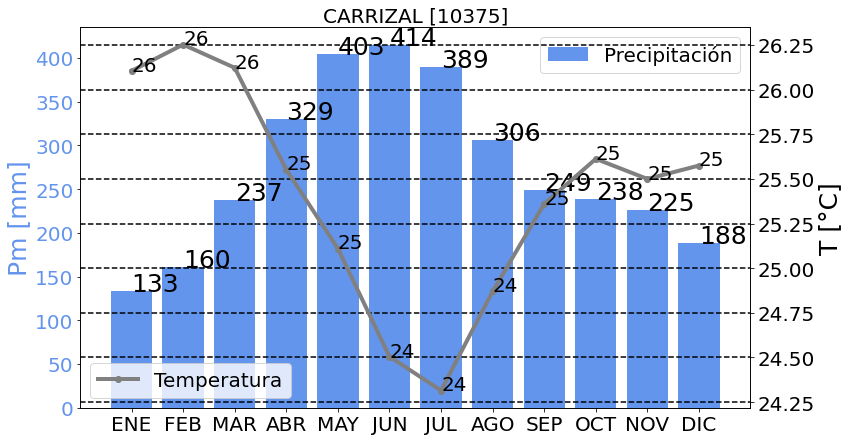

In [50]:
fig, ax1 = plt.subplots(figsize=[12,7])  

#color = 'tab:red'
#ax1.set_xlabel('Meses desde 1981 a 2021', size=15) 
ax1.set_ylabel('Pm [mm]', color = 'cornflowerblue', size=25) 
ax1.bar(Meses, Precm["Pm [mm]"], color = 'cornflowerblue', label="Precipitación")  
ax1.tick_params(axis ='y', labelcolor = 'cornflowerblue')
plt.legend(loc="upper right", facecolor = "w", fontsize=20)

for index, value in enumerate(Precm["Pm [mm]"]): 
    plt.text(index, value, int(value), size=25)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

#import matplotlib.ticker as ticker
#ticks_y = ticker.FuncFormatter(lambda y,pos:'{:.2f}'.format(x/10))
#ax1.xaxis.set_major_formatter(ticks_y)

#plt.yticks(range(20))

ax2 = ax1.twinx()  
  
#color = 'tab:green'
ax2.set_ylabel('T [°C]', color = 'k', size=25)   
ax2.plot(Meses, Tempm["T2m1m []"], "ob-", color = 'grey', label="Temperatura", linewidth=4)  
ax2.tick_params(axis ='y', labelcolor = 'k')
plt.legend(loc="lower left", facecolor = "w", fontsize=20)

for index, value in enumerate(Tempm["T2m1m []"]): 
    plt.text(index, value, int(value), size=20)

#plt.yticks(range(20))

#plt.title('Promedio de Precipitación y Temperatura', fontweight ="bold", size=20)  

plt.grid(color = 'k', linestyle = '--', linewidth = 1.5)
#plt.grid(axis='y')

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title("CARRIZAL [10375]",size=20)

plt.show()

In [9]:
ENSO = pd.read_csv("Datos del ENSO.csv")
Enso = ENSO.iloc[34:78]
Enso = Enso.drop([43,54,65,76],axis=0)
E=Enso.astype(float)

import statistics

mes=["DJF","JFM","FMA","MAM","AMJ","MJJ","JJA","JAS","ASO","SON","OND","NDJ"]

EneroM=list()
FebreroM=list()
MarzoM=list()
AbrilM=list()
MayoM=list()
JunioM=list()
JulioM=list()
AgostoM=list()
SeptiembreM=list()
OctubreM=list()
NoviembreM=list()
DiciembreM=list()

EneroF=list()
FebreroF=list()
MarzoF=list()
AbrilF=list()
MayoF=list()
JunioF=list()
JulioF=list()
AgostoF=list()
SeptiembreF=list()
OctubreF=list()
NoviembreF=list()
DiciembreF=list()

EnsoMF=pd.DataFrame()

for i in range(34,42):
    if E["DJF"].loc[i]>0.5:
        EneroM.append(E["DJF"].loc[i])
    elif E["DJF"].loc[i]<(-0.5):
        EneroF.append(E["DJF"].loc[i])
        
for i in range (44,53):
    if E["DJF"].loc[i]>0.5:
        EneroM.append(E["DJF"].loc[i])
    elif E["DJF"].loc[i]<(-0.5):
        EneroF.append(E["DJF"].loc[i])

for i in range (55,64):
    if E["DJF"].loc[i]>0.5:
        EneroM.append(E["DJF"].loc[i])
    elif E["DJF"].loc[i]<(-0.5):
        EneroF.append(E["DJF"].loc[i])
        
for i in range (66,75):
    if E["DJF"].loc[i]>0.5:
        EneroM.append(E["DJF"].loc[i])
    elif E["DJF"].loc[i]<(-0.5):
        EneroF.append(E["DJF"].loc[i])

#_____________________________________________________

for i in range(34,42):
    if E["JFM"].loc[i]>0.5:
        FebreroM.append(E["JFM"].loc[i])
    elif E["JFM"].loc[i]<(-0.5):
        FebreroF.append(E["JFM"].loc[i])
        
for i in range (44,53):
    if E["JFM"].loc[i]>0.5:
        FebreroM.append(E["JFM"].loc[i])
    elif E["JFM"].loc[i]<(-0.5):
        FebreroF.append(E["JFM"].loc[i])

for i in range (55,64):
    if E["JFM"].loc[i]>0.5:
        FebreroM.append(E["JFM"].loc[i])
    elif E["JFM"].loc[i]<(-0.5):
        FebreroF.append(E["JFM"].loc[i])
        
for i in range (66,75):
    if E["JFM"].loc[i]>0.5:
        FebreroM.append(E["JFM"].loc[i])
    elif E["JFM"].loc[i]<(-0.5):
        FebreroF.append(E["JFM"].loc[i])
        
#___________________________________________

for i in range(34,42):
    if E["FMA"].loc[i]>0.5:
        MarzoM.append(E["FMA"].loc[i])
    elif E["FMA"].loc[i]<(-0.5):
        MarzoF.append(E["FMA"].loc[i])
        
for i in range (44,53):
    if E["FMA"].loc[i]>0.5:
        MarzoM.append(E["FMA"].loc[i])
    elif E["FMA"].loc[i]<(-0.5):
        MarzoF.append(E["FMA"].loc[i])

for i in range (55,64):
    if E["FMA"].loc[i]>0.5:
        MarzoM.append(E["FMA"].loc[i])
    elif E["FMA"].loc[i]<(-0.5):
        MarzoF.append(E["FMA"].loc[i])
        
for i in range (66,75):
    if E["FMA"].loc[i]>0.5:
        MarzoM.append(E["FMA"].loc[i])
    elif E["FMA"].loc[i]<(-0.5):
        MarzoF.append(E["FMA"].loc[i])
        
#___________________________________________

for i in range(34,42):
    if E["MAM"].loc[i]>0.5:
        AbrilM.append(E["MAM"].loc[i])
    elif E["MAM"].loc[i]<(-0.5):
        AbrilF.append(E["MAM"].loc[i])
        
for i in range (44,53):
    if E["MAM"].loc[i]>0.5:
        AbrilM.append(E["MAM"].loc[i])
    elif E["MAM"].loc[i]<(-0.5):
        AbrilF.append(E["MAM"].loc[i])

for i in range (55,64):
    if E["MAM"].loc[i]>0.5:
        AbrilM.append(E["MAM"].loc[i])
    elif E["MAM"].loc[i]<(-0.5):
        AbrilF.append(E["MAM"].loc[i])
        
for i in range (66,75):
    if E["MAM"].loc[i]>0.5:
        AbrilM.append(E["MAM"].loc[i])
    elif E["MAM"].loc[i]<(-0.5):
        AbrilF.append(E["MAM"].loc[i])
        
#___________________________________________

for i in range(34,42):
    if E["AMJ"].loc[i]>0.5:
        MayoM.append(E["AMJ"].loc[i])
    elif E["AMJ"].loc[i]<(-0.5):
        MayoF.append(E["AMJ"].loc[i])
        
for i in range (44,53):
    if E["AMJ"].loc[i]>0.5:
        MayoM.append(E["AMJ"].loc[i])
    elif E["AMJ"].loc[i]<(-0.5):
        MayoF.append(E["AMJ"].loc[i])

for i in range (55,64):
    if E["AMJ"].loc[i]>0.5:
        MayoM.append(E["AMJ"].loc[i])
    elif E["AMJ"].loc[i]<(-0.5):
        MayoF.append(E["AMJ"].loc[i])
        
for i in range (66,75):
    if E["AMJ"].loc[i]>0.5:
        MayoM.append(E["AMJ"].loc[i])
    elif E["AMJ"].loc[i]<(-0.5):
        MayoF.append(E["AMJ"].loc[i])

#___________________________________________

for i in range(34,42):
    if E["MJJ"].loc[i]>0.5:
        JunioM.append(E["MJJ"].loc[i])
    elif E["MJJ"].loc[i]<(-0.5):
        JunioF.append(E["MJJ"].loc[i])
        
for i in range (44,53):
    if E["MJJ"].loc[i]>0.5:
        JunioM.append(E["MJJ"].loc[i])
    elif E["MJJ"].loc[i]<(-0.5):
        JunioF.append(E["MJJ"].loc[i])

for i in range (55,64):
    if E["MJJ"].loc[i]>0.5:
        JunioM.append(E["MJJ"].loc[i])
    elif E["MJJ"].loc[i]<(-0.5):
        JunioF.append(E["MJJ"].loc[i])
        
for i in range (66,75):
    if E["MJJ"].loc[i]>0.5:
        JunioM.append(E["MJJ"].loc[i])
    elif E["MJJ"].loc[i]<(-0.5):
        JunioF.append(E["MJJ"].loc[i])

#___________________________________________

for i in range(34,42):
    if E["JJA"].loc[i]>0.5:
        JulioM.append(E["JJA"].loc[i])
    elif E["JJA"].loc[i]<(-0.5):
        JulioF.append(E["JJA"].loc[i])
        
for i in range (44,53):
    if E["JJA"].loc[i]>0.5:
        JulioM.append(E["JJA"].loc[i])
    elif E["JJA"].loc[i]<(-0.5):
        JulioF.append(E["JJA"].loc[i])

for i in range (55,64):
    if E["JJA"].loc[i]>0.5:
        JulioM.append(E["JJA"].loc[i])
    elif E["JJA"].loc[i]<(-0.5):
        JulioF.append(E["JJA"].loc[i])
        
for i in range (66,75):
    if E["JJA"].loc[i]>0.5:
        JulioM.append(E["JJA"].loc[i])
    elif E["JJA"].loc[i]<(-0.5):
        JulioF.append(E["JJA"].loc[i])
        
#___________________________________________

for i in range(34,42):
    if E["JAS"].loc[i]>0.5:
        AgostoM.append(E["JAS"].loc[i])
    elif E["JAS"].loc[i]<(-0.5):
        AgostoF.append(E["JAS"].loc[i])
        
for i in range (44,53):
    if E["JAS"].loc[i]>0.5:
        AgostoM.append(E["JAS"].loc[i])
    elif E["JAS"].loc[i]<(-0.5):
        AgostoF.append(E["JAS"].loc[i])

for i in range (55,64):
    if E["JAS"].loc[i]>0.5:
        AgostoM.append(E["JAS"].loc[i])
    elif E["JAS"].loc[i]<(-0.5):
        AgostoF.append(E["JAS"].loc[i])
        
for i in range (66,75):
    if E["JAS"].loc[i]>0.5:
        AgostoM.append(E["JAS"].loc[i])
    elif E["JAS"].loc[i]<(-0.5):
        AgostoF.append(E["JAS"].loc[i])
        
#___________________________________________

for i in range(34,42):
    if E["ASO"].loc[i]>0.5:
        SeptiembreM.append(E["ASO"].loc[i])
    elif E["ASO"].loc[i]<(-0.5):
        SeptiembreF.append(E["ASO"].loc[i])
        
for i in range (44,53):
    if E["ASO"].loc[i]>0.5:
        SeptiembreM.append(E["ASO"].loc[i])
    elif E["ASO"].loc[i]<(-0.5):
        SeptiembreF.append(E["ASO"].loc[i])

for i in range (55,64):
    if E["ASO"].loc[i]>0.5:
        SeptiembreM.append(E["ASO"].loc[i])
    elif E["ASO"].loc[i]<(-0.5):
        SeptiembreF.append(E["ASO"].loc[i])
        
for i in range (66,75):
    if E["ASO"].loc[i]>0.5:
        SeptiembreM.append(E["ASO"].loc[i])
    elif E["ASO"].loc[i]<(-0.5):
        SeptiembreF.append(E["ASO"].loc[i])
    
#___________________________________________

for i in range(34,42):
    if E["SON"].loc[i]>0.5:
        OctubreM.append(E["SON"].loc[i])
    elif E["SON"].loc[i]<(-0.5):
        OctubreF.append(E["SON"].loc[i])
        
for i in range (44,53):
    if E["SON"].loc[i]>0.5:
        OctubreM.append(E["SON"].loc[i])
    elif E["SON"].loc[i]<(-0.5):
        OctubreF.append(E["SON"].loc[i])

for i in range (55,64):
    if E["SON"].loc[i]>0.5:
        OctubreM.append(E["SON"].loc[i])
    elif E["SON"].loc[i]<(-0.5):
        OctubreF.append(E["SON"].loc[i])
        
for i in range (66,75):
    if E["SON"].loc[i]>0.5:
        OctubreM.append(E["SON"].loc[i])
    elif E["SON"].loc[i]<(-0.5):
        OctubreF.append(E["SON"].loc[i])
        
#___________________________________________

for i in range(34,42):
    if E["OND"].loc[i]>0.5:
        NoviembreM.append(E["OND"].loc[i])
    elif E["OND"].loc[i]<(-0.5):
        NoviembreF.append(E["OND"].loc[i])
        
for i in range (44,53):
    if E["OND"].loc[i]>0.5:
        NoviembreM.append(E["OND"].loc[i])
    elif E["OND"].loc[i]<(-0.5):
        NoviembreF.append(E["OND"].loc[i])

for i in range (55,64):
    if E["OND"].loc[i]>0.5:
        NoviembreM.append(E["OND"].loc[i])
    elif E["OND"].loc[i]<(-0.5):
        NoviembreF.append(E["OND"].loc[i])
        
for i in range (66,75):
    if E["OND"].loc[i]>0.5:
        NoviembreM.append(E["OND"].loc[i])
    elif E["OND"].loc[i]<(-0.5):
        NoviembreF.append(E["OND"].loc[i])
        
#___________________________________________

for i in range(34,42):
    if E["NDJ"].loc[i]>0.5:
        DiciembreM.append(E["NDJ"].loc[i])
    elif E["NDJ"].loc[i]<(-0.5):
        DiciembreF.append(E["NDJ"].loc[i])
        
for i in range (44,53):
    if E["NDJ"].loc[i]>0.5:
        DiciembreM.append(E["NDJ"].loc[i])
    elif E["NDJ"].loc[i]<(-0.5):
        DiciembreF.append(E["NDJ"].loc[i])

for i in range (55,64):
    if E["NDJ"].loc[i]>0.5:
        DiciembreM.append(E["NDJ"].loc[i])
    elif E["NDJ"].loc[i]<(-0.5):
        DiciembreF.append(E["NDJ"].loc[i])
        
for i in range (66,75):
    if E["NDJ"].loc[i]>0.5:
        DiciembreM.append(E["NDJ"].loc[i])
    elif E["NDJ"].loc[i]<(-0.5):
        DiciembreF.append(E["NDJ"].loc[i])
        
mediaEneM=statistics.mean(EneroM)
mediaFebM=statistics.mean(FebreroM)
mediaMarM=statistics.mean(MarzoM)
mediaAbrM=statistics.mean(AbrilM)
mediaMayM=statistics.mean(MayoM)
mediaJunM=statistics.mean(JunioM)
mediaJulM=statistics.mean(JulioM)
mediaAgoM=statistics.mean(AgostoM)
mediaSepM=statistics.mean(SeptiembreM)
mediaOctM=statistics.mean(OctubreM)
mediaNovM=statistics.mean(NoviembreM)
mediaDicM=statistics.mean(DiciembreM)

mediaEneF=statistics.mean(EneroF)
mediaFebF=statistics.mean(FebreroF)
mediaMarF=statistics.mean(MarzoF)
mediaAbrF=statistics.mean(AbrilF)
mediaMayF=statistics.mean(MayoF)
mediaJunF=statistics.mean(JunioF)
mediaJulF=statistics.mean(JulioF)
mediaAgoF=statistics.mean(AgostoF)
mediaSepF=statistics.mean(SeptiembreF)
mediaOctF=statistics.mean(OctubreF)
mediaNovF=statistics.mean(NoviembreF)
mediaDicF=statistics.mean(DiciembreF)

EnsoM=[mediaEneM,mediaFebM,mediaMarM,mediaAbrM,mediaMayM,mediaJunM,mediaJulM,mediaAgoM,mediaSepM,mediaOctM,mediaNovM,mediaDicM]
EnsoF=[mediaEneF,mediaFebF,mediaMarF,mediaAbrF,mediaMayF,mediaJunF,mediaJulF,mediaAgoF,mediaSepF,mediaOctF,mediaNovF,mediaDicF]

EnsoMF=pd.DataFrame(index=mes)
EnsoMF["EnsoNiño"]=EnsoM
EnsoMF["EnsoNiña"]=EnsoF
EnsoMF

,EnsoNiño,EnsoNiña
DJF,1.390909,-1.060000
JFM,1.311111,-1.012500
FMA,1.316667,-0.825000
MAM,0.971429,-0.825000
AMJ,0.900000,-0.760000
MJJ,0.844444,-0.760000
JJA,1.150000,-0.860000
JAS,1.242857,-0.980000
ASO,1.233333,-1.057143
SON,1.281818,-1.018182


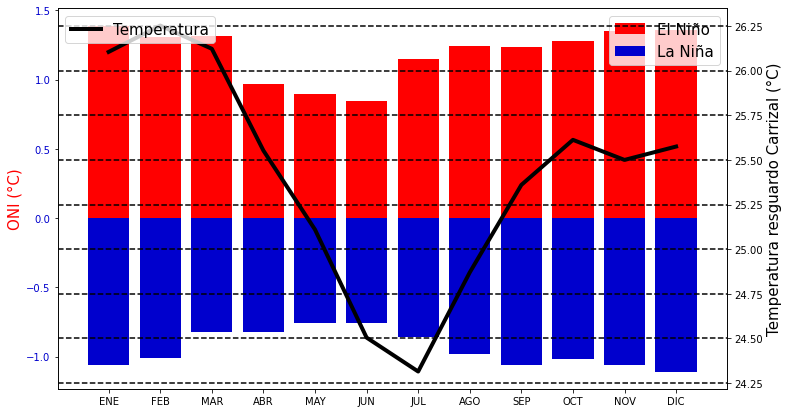

In [53]:
# https://es.acervolima.com/use-diferentes-ejes-y-a-la-izquierda-y-a-la-derecha-de-una-grafica-de-matplotlib/
# Datos del ENSO https://origin.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php

fig, ax1 = plt.subplots(figsize=[12,7])  

#color = 'tab:red'
#ax1.set_xlabel('Meses desde 1981 a 2021', size=15) 
ax1.set_ylabel('ONI (°C)', color = 'red', size=15) 
ax1.bar(Meses, EnsoMF["EnsoNiño"], color = 'red', label="El Niño")
ax1.bar(Meses, EnsoMF["EnsoNiña"], color = 'mediumblue', label="La Niña")
ax1.tick_params(axis ='y', labelcolor = 'mediumblue')
plt.legend(loc="upper right", facecolor = "w", fontsize=15)
  
ax2 = ax1.twinx()  
  
#color = 'tab:green'
ax2.set_ylabel('Temperatura resguardo Carrizal (°C)', color = 'k', size=15)   
ax2.plot(Meses, Tempm["T2m1m []"], color = 'k', label="Temperatura", linewidth=4)  
ax2.tick_params(axis ='y', labelcolor = 'k')
plt.legend(loc="upper left", facecolor = "w", fontsize=15)

plt.grid(color = 'k', linestyle = '--', linewidth = 1.5)
#plt.title('Promedio de Precipitación y Temperatura', fontweight ="bold", size=20)  
  
plt.show()